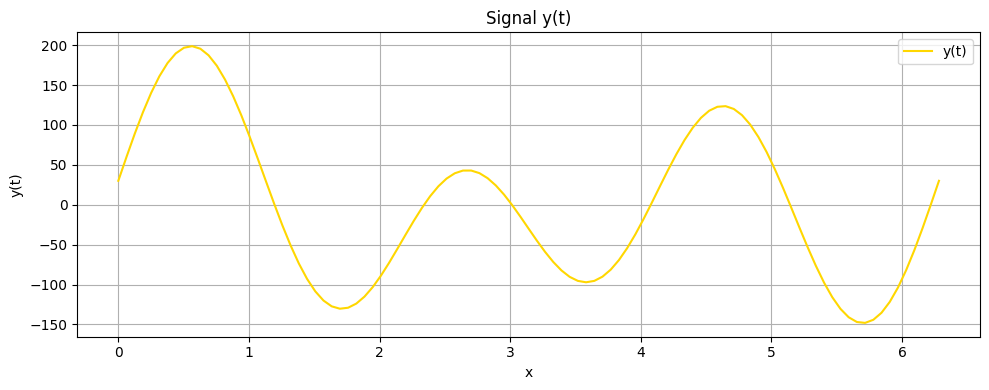

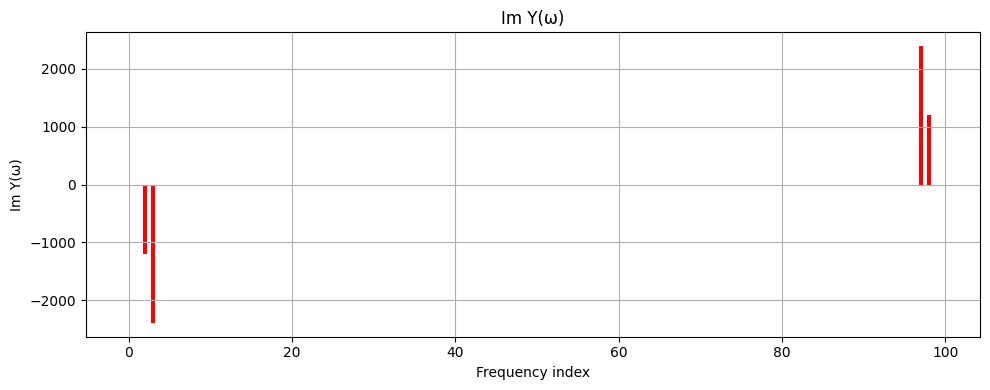

In [2]:
"""
From "COMPUTATIONAL PHYSICS: PROBLEM SOLVING with PYTHON"
4th Ed. by RH Landau, MJ Paez, and CC Bordeianu (D)
Copyright R Landau, Oregon State Univ, MJ Paez, Univ Antioquia, 
C Bordeianu, Univ Bucharest, 2024. 
Please respect copyright & acknowledge our work.
"""

import numpy as np
import matplotlib.pyplot as plt

# Constants and array declarations
N = 100
twopi = 2.0 * np.pi
h = twopi / N
sq2pi = 1.0 / np.sqrt(twopi)
x_vals = np.linspace(0, twopi, N + 1)
y = np.zeros(N + 1, dtype=float)
Ycomplex = np.zeros(N, dtype=complex)

# Define the signal
def Signal(y):
    for i, x in enumerate(x_vals):
        y[i] = 30 * np.cos(x) + 60 * np.sin(2 * x) + 120 * np.sin(3 * x)
    return y

# Perform the Discrete Fourier Transform
def DFT(y, Ycomplex):
    for n in range(N):
        zsum = complex(0.0, 0.0)
        for k in range(N):
            zexpo = complex(0, twopi * k * n / N)
            zsum += y[k] * np.exp(-zexpo)
        Ycomplex[n] = zsum * sq2pi
    return Ycomplex

# Generate and transform signal
y = Signal(y)
Ycomplex = DFT(y, Ycomplex)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(x_vals, y, label='y(t)', color='gold')
plt.title("Signal y(t)")
plt.xlabel("x")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot imaginary part of the DFT
plt.figure(figsize=(10, 4))
plt.bar(range(N), [yc.imag for yc in Ycomplex], color='red', width=0.5)
plt.title("Im Y(ω)")
plt.xlabel("Frequency index")
plt.ylabel("Im Y(ω)")
plt.grid(True)
plt.tight_layout()
plt.show()
